# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Vitro Ramadhan]
- **Email:** [muvira123@gmail.com]
- **ID Dicoding:** [muhammadvitro]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Adakah pengaruh suhu terhadap total peminjaman sepeda?
- Pertanyaan 2: Adakah pengaruh musim terhadap total peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat Data day_df

In [64]:
day_df = pd.read_csv("https://raw.githubusercontent.com/callmev-git/dicoding-project-1/103bb60a5262866bc4c292eb5efba5415490f652/Bike-sharing-dataset/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Menampilkan 10 data pertama

#### Memuat Data hour_df

In [65]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/callmev-git/dicoding-project-1/main/Bike-sharing-dataset/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Menampilkan 10 data pertama

**Insight:**
- instant : Indeks
- dteday : Tanggal peminjaman
- season : Musim dingin (1), musim semi (2), musim panas (3), musim gugur (4)
- yr : Tahun. 2011 (0), 2012 (1)
- mnth : Bulan, 1 sampai 12
- hr : Jam, 0 hingga 23
- holiday : Libur atau tidak
- weekday : Hari dalam seminggu
- workingday : Hari kerja (1) hari libur (0)
- weathersit : kondisi cuaca, Cerah (1), Mendung (2), Hujan atau salju ringan (3), Hujan Lebat (4)
- temp : suhu dalam derajat Celsius pada saat peminjaman sepeda dilakukan
- atemp: suhu yang dirasakan dalam derajat Celsius pada saat peminjaman sepeda dilakukan
- hum: Kelembapan
- windspeed: Kecepatan angin
- casual: Jumlah peminjam sepeda biasa
- registered: Jumlah peminjam sepeda yang terdaftar member
- cnt: Total jumlah peminjam sepeda, gabungan dari jumlah peminjam casual dan registered

## Assessing Data

### Menilai tabel ``` day_df  ```






In [66]:
# Mendapatkan gambaran umum
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada missing value, tapi kolom dteday memiliki kesalahan tipe data. Seharusnya data tersebut **merupakan** datetime, bukan **object**.

In [67]:
# Mengecek nilai duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [68]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai `hour_df`



In [69]:
# Mendapatkan gambaran umum
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti data day_df, data ini tidak terdapat missing value, tetapi terdapat kesalahan tipe data pada dteday yang seharusnya **datetime** dan bukan **object**.

In [70]:
# Mengecek nilai duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat nilai duplikat

In [71]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Tabel `day_df`

Sebagaimana dengan yang telah dianalisis pada bagian Assessing Data, kita perlu mengubah tipe data untuk dteday dari object menjadi datetime

In [72]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data dteday berhasil diperbaiki menjadi datetime

#### Membersihkan Tabel ``` hour_df ```


Sama seperti tabel ``` day_df ```, kita perlu mengubah tipe data dteday menjadi **datetime**

In [74]:
hour_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [75]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data dteday berhasil diperbaiki menjadi datetime

**Insight:**
- Data ``` day_df ``` sudah diperbaiki
- Data ``` hour_df ``` sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Eksplorasi Data Day_df

**Menampilkan rangkuman parameter statistik dengan menggunakan function describe()**

In [76]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Menampilkan hubungan antara musim dengan jumlah pengguna sepeda menggunakan function groupby()**

In [77]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                      
       nunique      sum   max   min         mean          std
season                                                       
1          181   471348  7836   431  2604.132597  1399.942119
2          184   918589  8362   795  4992.331522  1695.977235
3          188  1061129  8714  1115  5644.303191  1459.800381
4          178   841613  8555    22  4728.162921  1699.615261

### Eksplorasi Data hour_df

**Menampilkan rangkuman parameter statistik dengan menggunakan function describe()**

In [78]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Menampilkan hubungan antara suhu dengan jumlah pengguna sepeda menggunakan function groupby()**

In [79]:
hour_df.groupby(by="temp").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant     cnt                                  
     nunique     sum  max  min        mean         std
temp                                                  
0.02      17     712  315    1   41.882353   80.875585
0.04      16     570  180    1   35.625000   57.779898
0.06      16     672  102    2   42.000000   30.583220
0.08      17     480   84    1   28.235294   27.019737
0.10      51    2514  417    1   49.294118   74.691979
0.12      76    4440  423    1   58.421053   70.434700
0.14     138    7605  245    1   55.108696   61.825713
0.16     230   15083  501    1   65.578261   73.083074
0.18     155    9318  471    1   60.116129   65.678967
0.20     354   28230  679    1   79.745763  101.825590
0.22     421   29434  729    1   69.914489   93.249396
0.24     522   41843  692    1   80.159004  105.338899
0.26     559   49170  688    1   87.960644   98.656142
0.28     301   32132  691    1  106.750831  112.994636
0.30     641   74303  668    1  115.917317  114.875059
0.32     611   82015  711    1  134.230769  134.109745
0.34     645   87274  724    1  135.308527  129.494668
0.36     671   99202  731    1  147.842027  128.815564
0.38     372   61087  798    1  164.212366  146.321584
0.40     614  102809  817    1  167.441368  149.670543
0.42     548   96087  745    1  175.341241  160.343491
0.44     507   80566  835    1  158.907298  159.942558
0.46     559   91065  837    1  162.906977  156.436236
0.48     288   54845  805    2  190.434028  154.737169
0.50     531  105366  839    1  198.429379  178.905974
0.52     556  112850  943    1  202.967626  178.941751
0.54     569  113962  888    1  200.284710  181.812664
0.56     579  123756  856    1  213.740933  200.661437
0.58     305   67730  948    1  222.065574  184.534770
0.60     675  149905  900    2  222.081481  205.411726
0.62     726  148185  968    1  204.111570  191.743118
0.64     692  154985  976    1  223.966763  198.436859
0.66     693  156204  977    1  225.402597  210.937101
0.68     349   73129  938    3  209.538682  191.651539
0.70     690  177298  970    2  256.953623  201.646756
0.72     570  163449  957    2  286.752632  200.704857
0.74     516  161587  953    4  313.153101  189.863461
0.76     396  135660  891    4  342.575758  198.905122
0.78     169   52930  872    6  313.195266  203.879875
0.80     325  112897  913   22  347.375385  186.737769
0.82     213   72354  897   48  339.690141  186.496896
0.84     138   44963  794   67  325.818841  154.717507
0.86     131   42307  810   94  322.954198  165.642565
0.88      53   19274  705  102  363.660377  139.494960
0.90      90   27836  772  106  309.288889  158.921947
0.92      49   15681  770  118  320.020408  146.752554
0.94      17    3690  374  104  217.058824   83.679799
0.96      16    4392  464  101  274.500000  103.521978
0.98       1     539  539  539  539.000000         NaN
1.00       1     294  294  294  294.000000         NaN

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Adakah pengaruh suhu terhadap total peminjaman sepeda?

#### Membuat Clustering untuk Temperatur

In [80]:
hour_df["temp_bins"] = pd.cut(hour_df["temp"], bins=11, labels=range(0, 11))

#### Membuat Grafik Hubungan Antara Temperatur dengan Peminjaman Sepeda

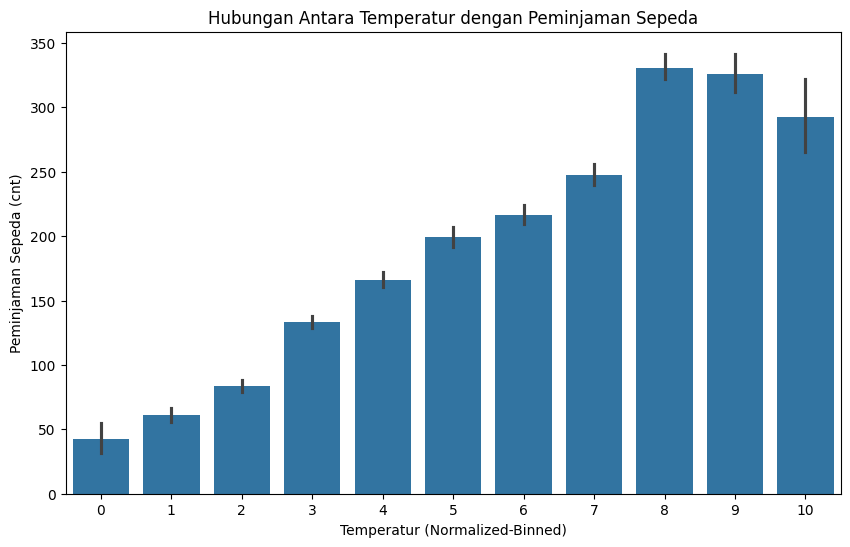

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x='temp_bins', y='cnt', data=hour_df)
plt.title('Hubungan Antara Temperatur dengan Peminjaman Sepeda')
plt.xlabel('Temperatur (Normalized-Binned)')
plt.ylabel('Peminjaman Sepeda (cnt)')
plt.show()

### Pertanyaan 2: Adakah pengaruh musim terhadap total peminjaman sepeda?

#### Menamai Setiap Musim

In [82]:
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
day_df['season_name'] = day_df['season'].map(season_mapping)

In [83]:
season_rentals = day_df.groupby('season_name')['cnt'].sum()

#### Membuat Grafik Hubungan Antara Musim terhadap Total Peminjaman Sepeda

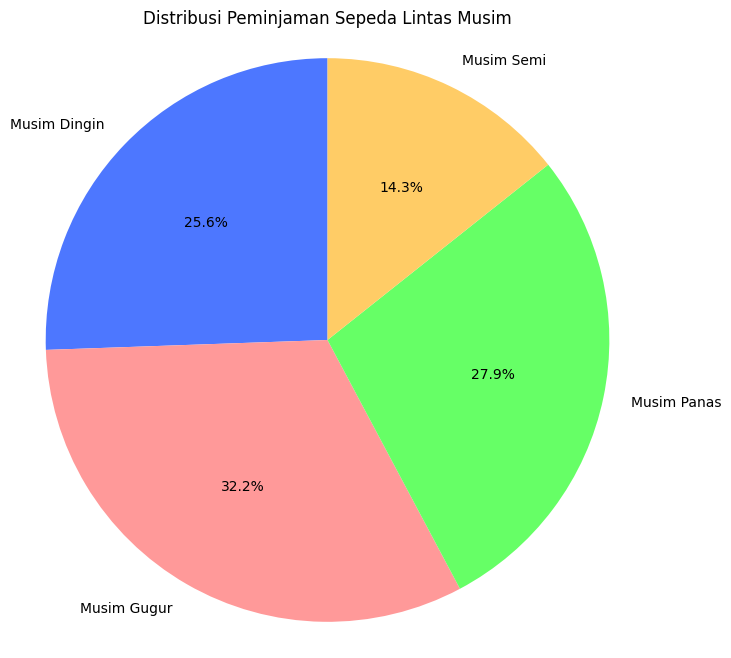

In [84]:
plt.figure(figsize=(8,8))
plt.pie(season_rentals, labels=season_rentals.index, autopct='%1.1f%%', startangle=90, colors=['#4D77FF','#FF9999','#66FF66','#FFCC66'])
plt.title('Distribusi Peminjaman Sepeda Lintas Musim')
plt.axis('equal')
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Dapat disimpulkan bahwa suhu memiliki pengaruh terhadap total peminjaman sepeda. Sebagaimana pada grafik yang telah dibuat, total pengguna sepeda meningkat seiring bertambahnya suhu hingga binning ke 8 dan menurun pada binning 9 dan 10. Hal ini menunjukkan pengguna sepeda lebih memilih meminjam sepeda ketika suhunya hangat, tetapi juga tidak terlalu panas.
- Conclution pertanyaan 2: Dapat disimpulkan bahwa sebagian besar pengguna sepeda lebih memilih menggunakan sepeda pada musim gugur, sebagaimana yang ditunjukkan pada grafik distribusi peminjaman sepeda lintas musim, dengan persentase penggunanya sebesar 32.2%.